# Brain MRI Segmentation

*   Below code snippet mounts the Google Drive from where we are able to access the pretrained models. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Packages

*   Here we are importing all the necessary packages

In [ ]:
# !pip install tensorflow_io

In [ ]:
import cv2
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

In [ ]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Utility Functions

*   The *parse_data()* funtion performs the image-preprocessing tasks
*   Furthermore, we are loading the *binary_classification* model and the *image_segmentation* model alongwith the dataframe to access the images

In [ ]:
def parse_data(image_path):

  '''Function to perform image-preprocessing'''

  image = tf.io.read_file(image_path) #reads the image from the file path  
  image = tfio.experimental.image.decode_tiff(image)  #decodes the tiff file   
  image = tf.image.convert_image_dtype(image, tf.float32) #converts the float values in [0 1] interval
  image = tf.image.resize(image, [256, 256]) # resizes the image
  return image

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/brain_mri/images_masks_diagnosis.csv')

In [ ]:
binary_model = load_model('/content/gdrive/My Drive/brain_mri/xception_model_epochs:013-val_accuracy:0.916.h5', compile=False)

In [ ]:
segment_model = load_model('/content/gdrive/My Drive/brain_mri/segmentation/unet_epochs:040-val_iou:0.807.h5', compile=False)

## Function 1

*  This function takes in a datapoint and checks if the image has a mask present or not. If not, then it returns a statement as no mask present. If yes, then it returns the image, the actual_mask and the predicted_mask

In [ ]:
def func_one(datapoint):

  '''Function to check for masks and generate them if true'''

  image_path = datapoint['images']
  mask_path = datapoint['masks']
  target_label = datapoint['diagnosis']  

  image = parse_data(image_path)  
  image =image[np.newaxis, :, :, :]

  pred_label = int(np.round(binary_model.predict(image)))  
  
  if pred_label == 0:
    print('The image has no mask present')
  else:    
    pred=segment_model.predict(image)
    pred=pred.astype(int)    

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(image))    
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(mask_path)))    
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred), cmap='gray')    
    plt.title('Prediction')
    plt.show()

In [ ]:
data = df.loc[df['diagnosis'] == 0].iloc[37]
func_one(data)

The image has no mask present


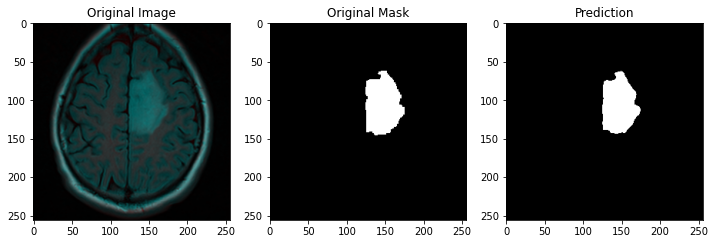

In [ ]:
data = df.loc[df['diagnosis'] == 1].iloc[43]
func_one(data)

## Function 2

*  This function directly takes in a datapoint and generate masks for them. If no mask present, then it will return an empty image

In [ ]:
def func_two(datapoint):

  '''Function to generate empty/non-empty masks'''

  image_path = datapoint['images']
  mask_path = datapoint['masks']
  target_label = datapoint['diagnosis']  

  image = parse_data(image_path)  
  image =image[np.newaxis, :, :, :]  
  
  pred=segment_model.predict(image)
  pred = pred.astype(int)     

  plt.figure(figsize=(12,12))
  plt.subplot(1,3,1)
  plt.imshow(np.squeeze(image))    
  plt.title('Original Image')
  plt.subplot(1,3,2)
  plt.imshow(np.squeeze(cv2.imread(mask_path)))    
  plt.title('Original Mask')
  plt.subplot(1,3,3)
  plt.imshow(np.squeeze(pred), cmap='gray')    
  plt.title('Prediction')
  plt.show()

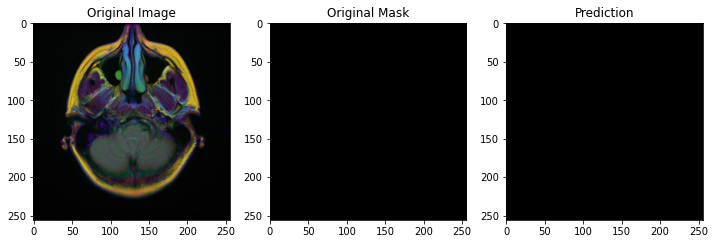

In [ ]:
data = df.loc[df['diagnosis'] == 0].iloc[37]
func_two(data)